In [10]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Caricamento del grafo dal file GML
file_path = '../data/cyber_incidents_graph.gml'
output_folder = './grafici/'


try:
    G = nx.read_gml(file_path)
    print(f"Grafo caricato correttamente da: {file_path}")
    
    # Stampa informazioni di base sul grafo
    print(f"Numero di nodi: {G.number_of_nodes()}")
    print(f"Numero di archi: {G.number_of_edges()}")
    print(f"Tipo di grafo: {'Diretto' if G.is_directed() else 'Non diretto'}")
    
except FileNotFoundError:
    print(f"ERRORE: Il file {file_path} non è stato trovato. Verifica il percorso.")
except Exception as e:
    print(f"ERRORE durante il caricamento del grafo: {e}")

Grafo caricato correttamente da: ../data/cyber_incidents_graph.gml
Numero di nodi: 54
Numero di archi: 88
Tipo di grafo: Diretto


Calcolo In-Degree Centrality...
Top 10 Paesi per In-Degree Centrality:
              Node  InDegree
16  United Kingdom  0.150943
17   United States  0.132075
11          Russia  0.113208
13     South Korea  0.075472
0            China  0.075472
3           France  0.056604
6            India  0.056604
25    Saudi Arabia  0.056604
2           Canada  0.037736
4          Germany  0.037736


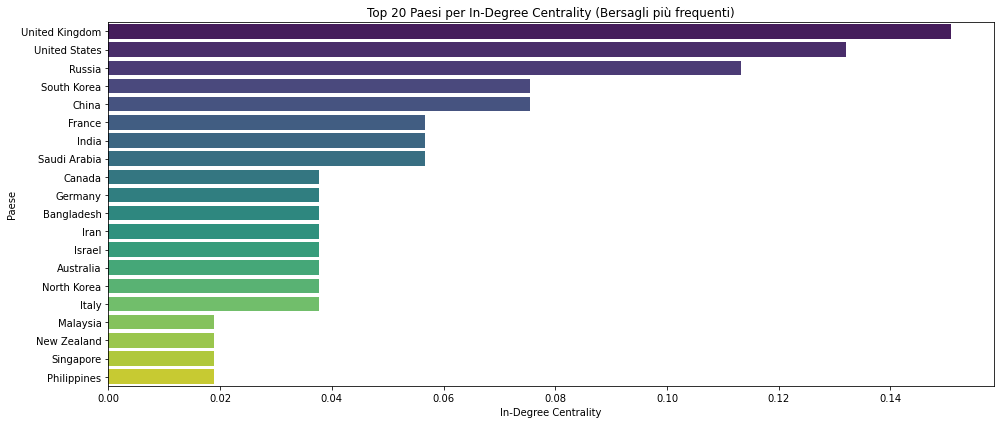

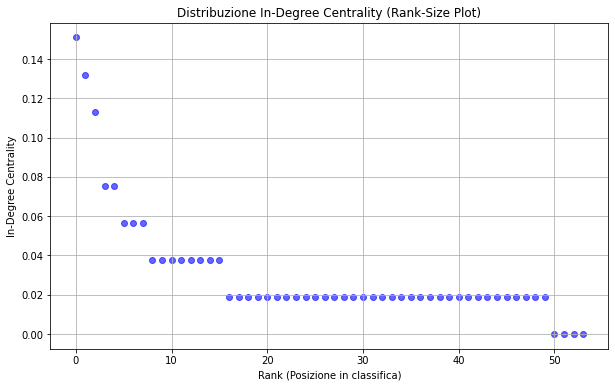

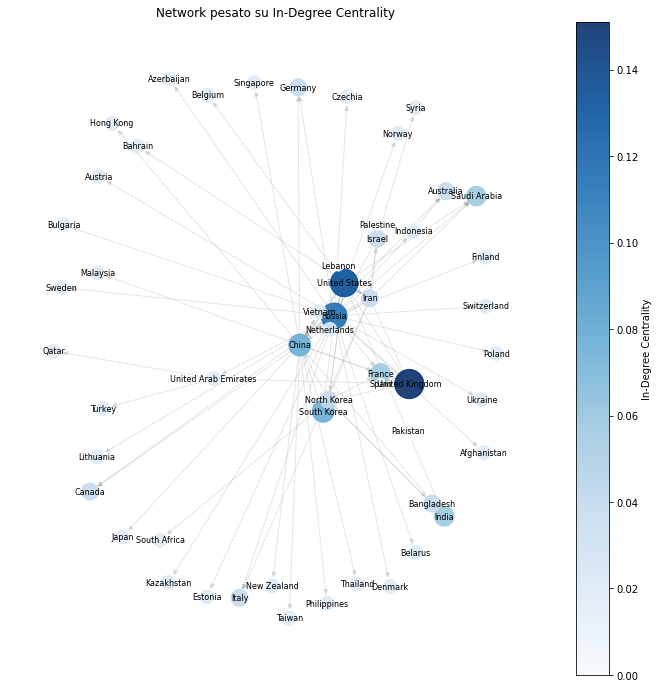

In [12]:
# --- IN-DEGREE CENTRALITY ---
# L'In-Degree Centrality misura il numero di connessioni in entrata.
# Nel contesto cyber, indica quanto spesso un paese è bersaglio di attacchi.

print("Calcolo In-Degree Centrality...")
in_degree_centrality = nx.in_degree_centrality(G)

# Creazione DataFrame per analisi e visualizzazione
df_in_degree = pd.DataFrame(list(in_degree_centrality.items()), columns=['Node', 'InDegree'])
df_in_degree = df_in_degree.sort_values(by='InDegree', ascending=False)

print("Top 10 Paesi per In-Degree Centrality:")
print(df_in_degree.head(10))

# 1. Bar Chart (Top 20)
plt.figure(figsize=(14, 6))
sns.barplot(x='InDegree', y='Node', data=df_in_degree.head(20), hue='Node', legend=False, palette='viridis')
plt.title('Top 20 Paesi per In-Degree Centrality (Bersagli più frequenti)')
plt.xlabel('In-Degree Centrality')
plt.ylabel('Paese')
plt.tight_layout()
plt.savefig(f"{output_folder}/in_degree_barchart.png")
plt.show()

# 2. Scatter Plot (Rank vs Score)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_in_degree)), df_in_degree['InDegree'], color='blue', alpha=0.6)
plt.title('Distribuzione In-Degree Centrality (Rank-Size Plot)')
plt.xlabel('Rank (Posizione in classifica)')
plt.ylabel('In-Degree Centrality')
plt.grid(True)
plt.savefig(f"{output_folder}/in_degree_scatterplot.png")
plt.show()

# 3. Spring Layout (Force-Directed Graph)
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
# Dimensione nodi proporzionale alla centralità
node_sizes = [v * 5000 + 100 for v in in_degree_centrality.values()]
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                               node_color=list(in_degree_centrality.values()), 
                               cmap=plt.cm.Blues, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)
plt.colorbar(nodes, label='In-Degree Centrality')
plt.title('Network pesato su In-Degree Centrality')
plt.axis('off')
plt.savefig(f"{output_folder}/in_degree_network.png")
plt.show()

Calcolo Out-Degree Centrality...
Top 10 Paesi per Out-Degree Centrality:
                    Node  OutDegree
11                Russia   0.490566
0                  China   0.339623
21                  Iran   0.169811
29           North Korea   0.150943
17         United States   0.132075
23                Israel   0.056604
48  United Arab Emirates   0.056604
31              Pakistan   0.037736
18               Vietnam   0.037736
16        United Kingdom   0.037736


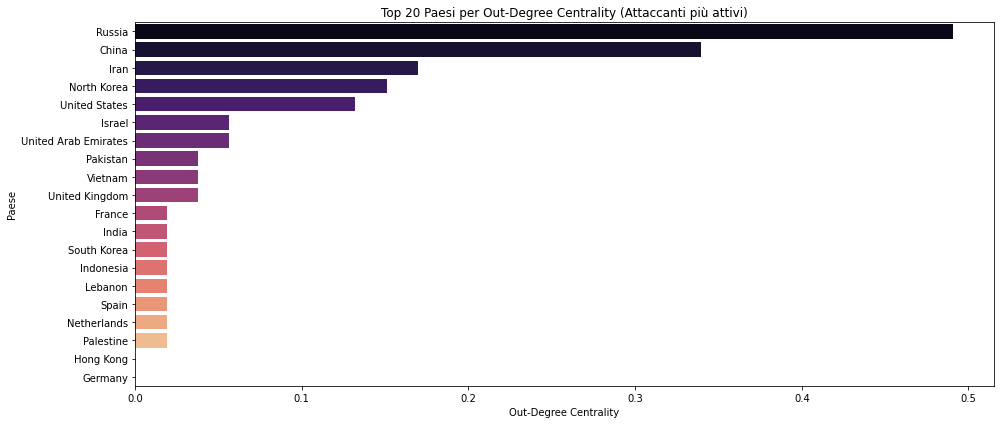

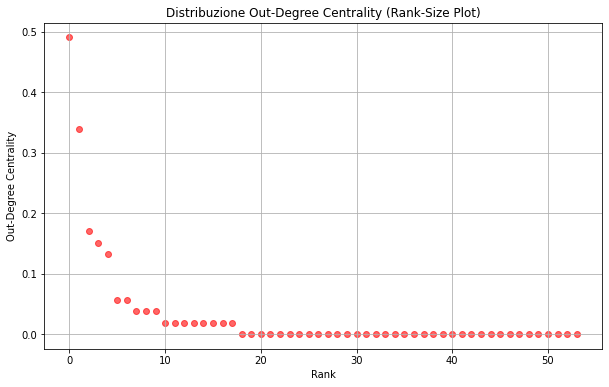

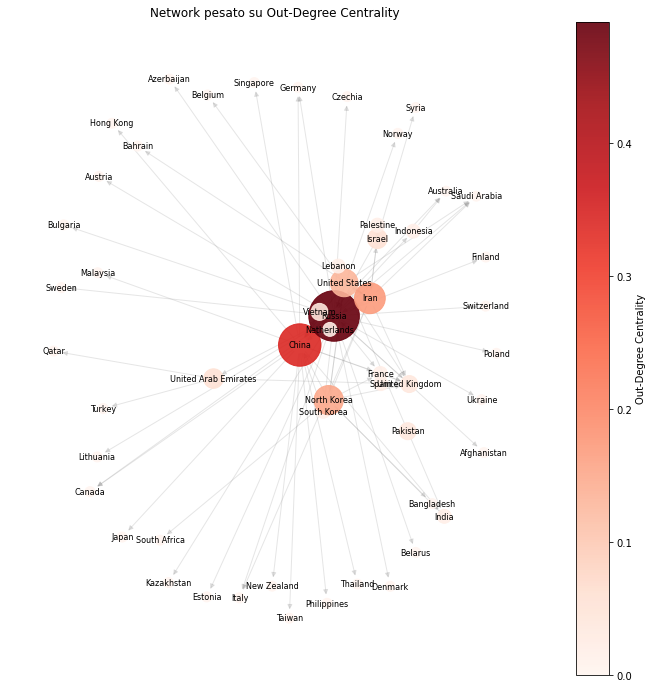

In [13]:
# --- OUT-DEGREE CENTRALITY ---
# L'Out-Degree Centrality misura il numero di connessioni in uscita.
# Indica quanto spesso un paese agisce come attaccante (Sponsor).

print("Calcolo Out-Degree Centrality...")
out_degree_centrality = nx.out_degree_centrality(G)

df_out_degree = pd.DataFrame(list(out_degree_centrality.items()), columns=['Node', 'OutDegree'])
df_out_degree = df_out_degree.sort_values(by='OutDegree', ascending=False)

print("Top 10 Paesi per Out-Degree Centrality:")
print(df_out_degree.head(10))

# 1. Bar Chart (Top 20)
plt.figure(figsize=(14, 6))
sns.barplot(x='OutDegree', y='Node', data=df_out_degree.head(20), hue='Node', legend=False, palette='magma')
plt.title('Top 20 Paesi per Out-Degree Centrality (Attaccanti più attivi)')
plt.xlabel('Out-Degree Centrality')
plt.ylabel('Paese')
plt.tight_layout()
plt.savefig(f"{output_folder}/out_degree_barchart.png")
plt.show()

# 2. Scatter Plot (Rank vs Score)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_out_degree)), df_out_degree['OutDegree'], color='red', alpha=0.6)
plt.title('Distribuzione Out-Degree Centrality (Rank-Size Plot)')
plt.xlabel('Rank')
plt.ylabel('Out-Degree Centrality')
plt.grid(True)
plt.savefig(f"{output_folder}/out_degree_scatterplot.png")
plt.show()

# 3. Spring Layout
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
node_sizes = [v * 5000 + 100 for v in out_degree_centrality.values()]
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                               node_color=list(out_degree_centrality.values()), 
                               cmap=plt.cm.Reds, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)
plt.colorbar(nodes, label='Out-Degree Centrality')
plt.title('Network pesato su Out-Degree Centrality')
plt.axis('off')
plt.savefig(f"{output_folder}/out_degree_network.png")
plt.show()

Calcolo Betweenness Centrality...
Top 10 Paesi per Betweenness Centrality:
                    Node  Betweenness
11                Russia     0.166987
17         United States     0.094448
0                  China     0.069237
16        United Kingdom     0.061502
29           North Korea     0.028852
21                  Iran     0.028042
23                Israel     0.022859
48  United Arab Emirates     0.010885
13           South Korea     0.005854
20             Indonesia     0.002540


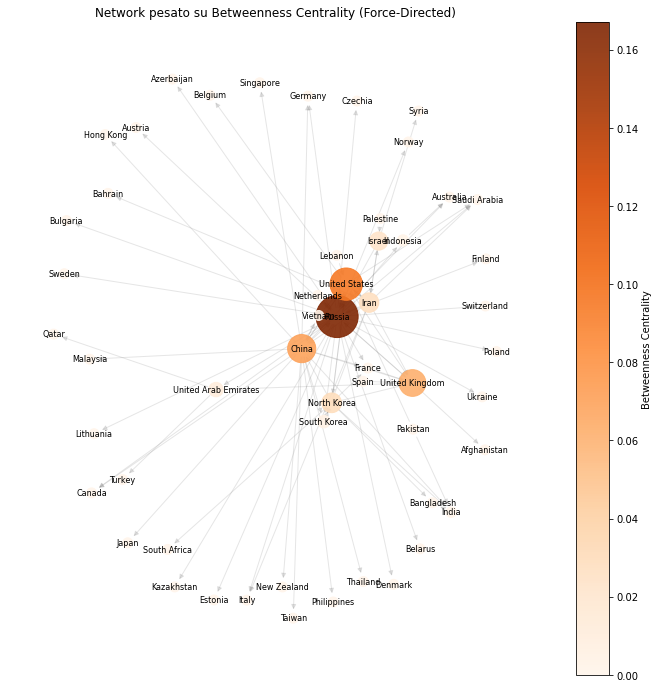

In [14]:
# --- BETWEENNESS CENTRALITY ---
# La Betweenness Centrality quantifica l'influenza di un nodo sul flusso di informazioni nel grafo.
# Nodi con alta betweenness agiscono come ponti o intermediari.

print("Calcolo Betweenness Centrality...")
betweenness_centrality = nx.betweenness_centrality(G)

df_betweenness = pd.DataFrame(list(betweenness_centrality.items()), columns=['Node', 'Betweenness'])
df_betweenness = df_betweenness.sort_values(by='Betweenness', ascending=False)

print("Top 10 Paesi per Betweenness Centrality:")
print(df_betweenness.head(10))

# Visualizzazione: Force-Directed Graph
plt.figure(figsize=(12, 12))
# Spring layout è un algoritmo force-directed
pos = nx.spring_layout(G, seed=42, k=0.2)
node_sizes = [v * 10000 + 100 for v in betweenness_centrality.values()]
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                               node_color=list(betweenness_centrality.values()), 
                               cmap=plt.cm.Oranges, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)
plt.colorbar(nodes, label='Betweenness Centrality')
plt.title('Network pesato su Betweenness Centrality (Force-Directed)')
plt.axis('off')
plt.savefig(f"{output_folder}/betweenness_network.png")
plt.show()

Calcolo In-Closeness Centrality...
Top 10 Paesi per In-Closeness Centrality:
              Node  InCloseness
0            China     0.520711
11          Russia     0.514794
21            Iran     0.487117
17   United States     0.481935
23          Israel     0.393929
29     North Korea     0.387196
18         Vietnam     0.359539
16  United Kingdom     0.338074
31        Pakistan     0.334538
28     Netherlands     0.333102


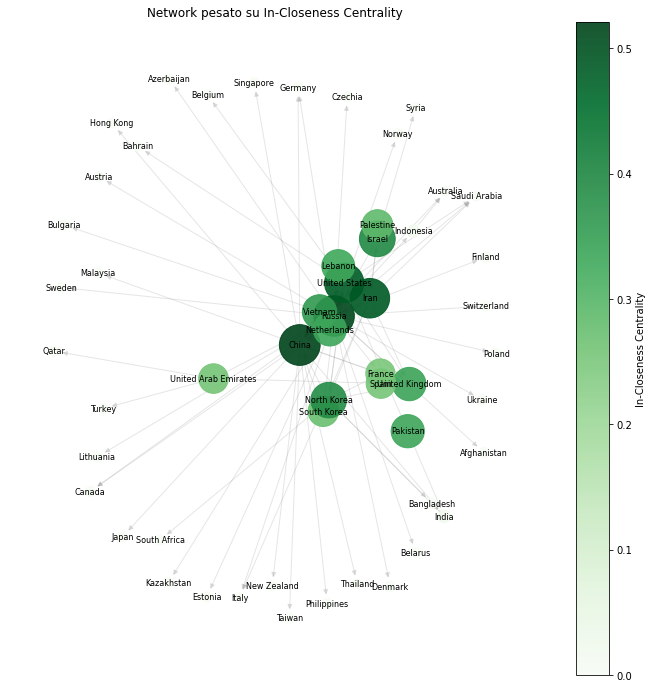

In [15]:
# --- IN-CLOSENESS CENTRALITY ---
# La Closeness Centrality misura quanto un nodo è vicino a tutti gli altri nodi.
# Per In-Closeness (quanto facilmente un nodo può essere raggiunto dagli altri), invertiamo il grafo.

print("Calcolo In-Closeness Centrality...")
G_reversed = G.reverse()
in_closeness_centrality = nx.closeness_centrality(G_reversed)

df_in_closeness = pd.DataFrame(list(in_closeness_centrality.items()), columns=['Node', 'InCloseness'])
df_in_closeness = df_in_closeness.sort_values(by='InCloseness', ascending=False)

print("Top 10 Paesi per In-Closeness Centrality:")
print(df_in_closeness.head(10))

# 1. Force-Directed Graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
node_sizes = [v * 3000 + 100 for v in in_closeness_centrality.values()]
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                               node_color=list(in_closeness_centrality.values()), 
                               cmap=plt.cm.Greens, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)
plt.colorbar(nodes, label='In-Closeness Centrality')
plt.title('Network pesato su In-Closeness Centrality')
plt.axis('off')
plt.savefig(f"{output_folder}/in_closeness_network.png")
plt.show()

Calcolo Out-Closeness Centrality...
Top 10 Paesi per Out-Closeness Centrality:
              Node  OutCloseness
16  United Kingdom      0.184578
11          Russia      0.169811
17   United States      0.157233
25    Saudi Arabia      0.142064
3           France      0.132665
13     South Korea      0.132665
4          Germany      0.130546
2           Canada      0.130546
52     Afghanistan      0.123851
0            China      0.121294


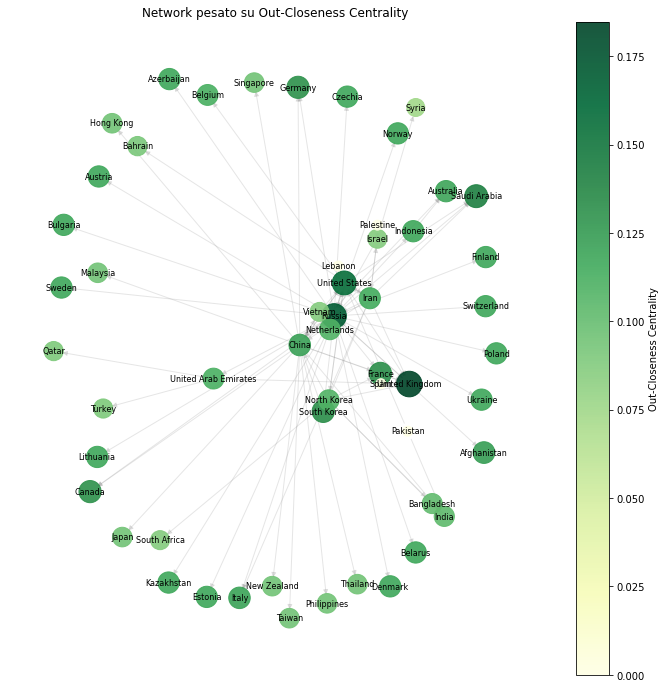

In [16]:
# --- OUT-CLOSENESS CENTRALITY ---
# Out-Closeness misura quanto facilmente un nodo può raggiungere tutti gli altri nodi.

print("Calcolo Out-Closeness Centrality...")
out_closeness_centrality = nx.closeness_centrality(G)

df_out_closeness = pd.DataFrame(list(out_closeness_centrality.items()), columns=['Node', 'OutCloseness'])
df_out_closeness = df_out_closeness.sort_values(by='OutCloseness', ascending=False)

print("Top 10 Paesi per Out-Closeness Centrality:")
print(df_out_closeness.head(10))

# 1. Force-Directed Graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
node_sizes = [v * 3000 + 100 for v in out_closeness_centrality.values()]
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                               node_color=list(out_closeness_centrality.values()), 
                               cmap=plt.cm.YlGn, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)
plt.colorbar(nodes, label='Out-Closeness Centrality')
plt.title('Network pesato su Out-Closeness Centrality')
plt.axis('off')
plt.savefig(f"{output_folder}/out_closeness_network.png")
plt.show()

Calcolo In-Eigenvector Centrality...
Top 10 Paesi per In-Eigenvector Centrality:
             Node  InEigenvector
17  United States       0.484050
21           Iran       0.483744
0           China       0.383899
29    North Korea       0.339582
18        Vietnam       0.273180
11         Russia       0.251518
23         Israel       0.231422
31       Pakistan       0.152351
27        Lebanon       0.152351
13    South Korea       0.106880


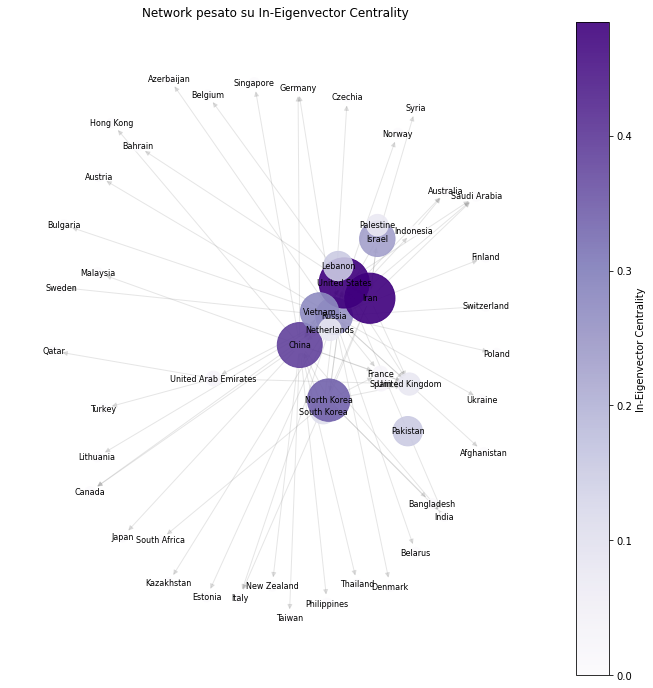

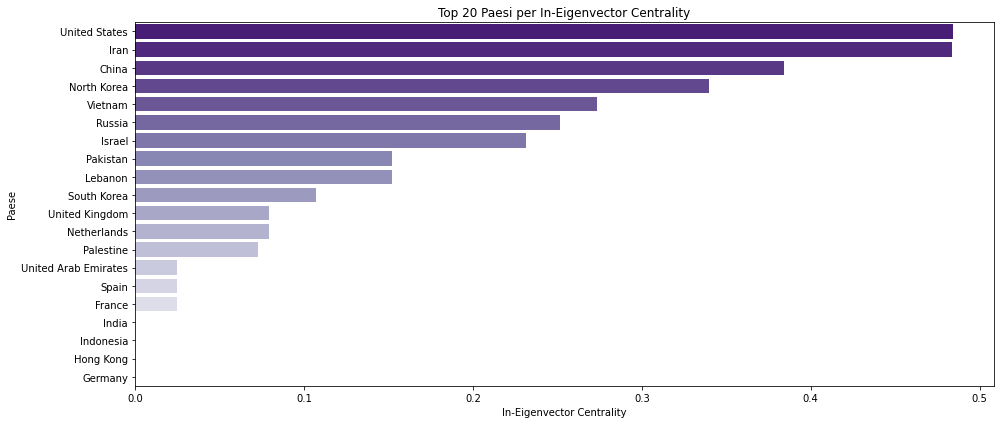

In [17]:
# --- IN-EIGENVECTOR CENTRALITY ---
# L'Eigenvector Centrality misura l'influenza di un nodo basandosi sull'influenza dei suoi vicini.
# Per In-Eigenvector (essere connessi a nodi importanti che ti puntano), usiamo il grafo inverso.

print("Calcolo In-Eigenvector Centrality...")
try:
    in_eigenvector_centrality = nx.eigenvector_centrality(G_reversed, max_iter=1000)
except nx.PowerIterationFailedConvergence:
    print("Convergenza fallita con il metodo standard, utilizzo metodo numpy.")
    in_eigenvector_centrality = nx.eigenvector_centrality_numpy(G_reversed)

df_in_eigen = pd.DataFrame(list(in_eigenvector_centrality.items()), columns=['Node', 'InEigenvector'])
df_in_eigen = df_in_eigen.sort_values(by='InEigenvector', ascending=False)

print("Top 10 Paesi per In-Eigenvector Centrality:")
print(df_in_eigen.head(10))

# 1. Force-Directed Graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
node_sizes = [v * 5000 + 100 for v in in_eigenvector_centrality.values()]
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                               node_color=list(in_eigenvector_centrality.values()), 
                               cmap=plt.cm.Purples, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)
plt.colorbar(nodes, label='In-Eigenvector Centrality')
plt.title('Network pesato su In-Eigenvector Centrality')
plt.axis('off')
plt.savefig(f"{output_folder}/in_eigenvector_network.png")
plt.show()

# 2. Bar Chart (Top 20)
plt.figure(figsize=(14, 6))
sns.barplot(x='InEigenvector', y='Node', data=df_in_eigen.head(20), hue='Node', legend=False, palette='Purples_r')
plt.title('Top 20 Paesi per In-Eigenvector Centrality')
plt.xlabel('In-Eigenvector Centrality')
plt.ylabel('Paese')
plt.tight_layout()
plt.savefig(f"{output_folder}/in_eigenvector_barchart.png")
plt.show()

Calcolo Out-Eigenvector Centrality...
Top 10 Paesi per Out-Eigenvector Centrality:
              Node  OutEigenvector
16  United Kingdom        0.436167
11          Russia        0.351919
17   United States        0.266504
13     South Korea        0.248449
25    Saudi Arabia        0.223951
3           France        0.219144
0            China        0.182256
2           Canada        0.168130
4          Germany        0.168130
29     North Korea        0.162080


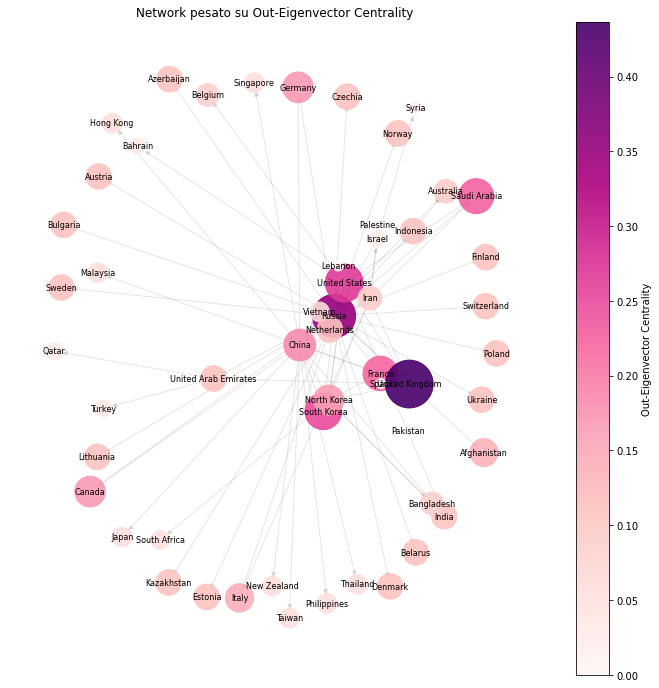

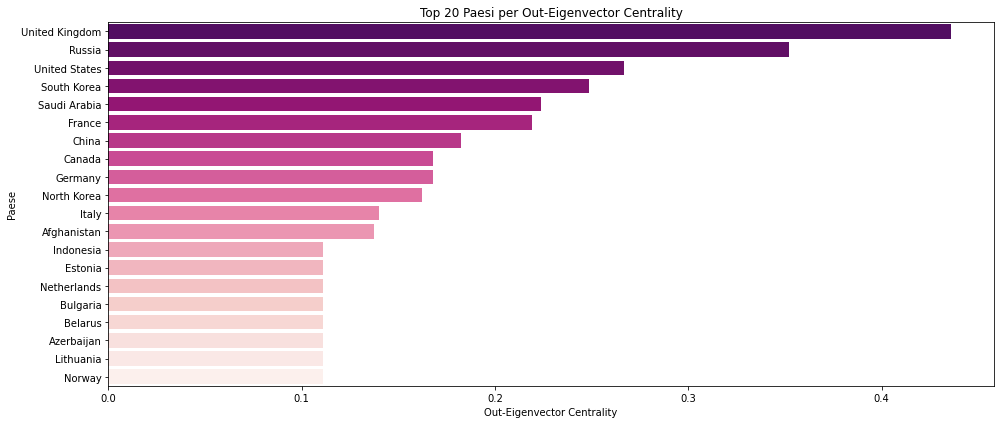

In [18]:
# --- OUT-EIGENVECTOR CENTRALITY ---
# Out-Eigenvector misura l'influenza verso nodi importanti.

print("Calcolo Out-Eigenvector Centrality...")
try:
    out_eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
except nx.PowerIterationFailedConvergence:
    print("Convergenza fallita con il metodo standard, utilizzo metodo numpy.")
    out_eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

df_out_eigen = pd.DataFrame(list(out_eigenvector_centrality.items()), columns=['Node', 'OutEigenvector'])
df_out_eigen = df_out_eigen.sort_values(by='OutEigenvector', ascending=False)

print("Top 10 Paesi per Out-Eigenvector Centrality:")
print(df_out_eigen.head(10))

# 1. Force-Directed Graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
node_sizes = [v * 5000 + 100 for v in out_eigenvector_centrality.values()]
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                               node_color=list(out_eigenvector_centrality.values()), 
                               cmap=plt.cm.RdPu, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)
plt.colorbar(nodes, label='Out-Eigenvector Centrality')
plt.title('Network pesato su Out-Eigenvector Centrality')
plt.axis('off')
plt.savefig(f"{output_folder}/out_eigenvector_network.png")
plt.show()

# 2. Bar Chart (Top 20)
plt.figure(figsize=(14, 6))
sns.barplot(x='OutEigenvector', y='Node', data=df_out_eigen.head(20), hue='Node', legend=False, palette='RdPu_r')
plt.title('Top 20 Paesi per Out-Eigenvector Centrality')
plt.xlabel('Out-Eigenvector Centrality')
plt.ylabel('Paese')
plt.tight_layout()
plt.savefig(f"{output_folder}/out_eigenvector_barchart.png")
plt.show()